In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from sklearn.metrics import accuracy_score , balanced_accuracy_score, f1_score, roc_auc_score
import time

In [2]:
df = pd.read_csv('data/dataFile.csv')
df

,seconds_elapsed,z_accelerometer,y_accelerometer,x_accelerometer,z_gyroscope,y_gyroscope,x_gyroscope,user
0,0.040027,-0.743177,-0.262221,-0.391995,0.203035,0.026631,-0.031968,3
1,0.040460,0.600845,0.465898,-1.121842,-0.556805,-0.030059,-0.312905,1
2,0.049252,1.260347,-0.319836,-0.342097,-0.110204,0.161805,-0.306240,1
3,0.049960,-0.585656,-0.278538,-0.433894,0.171001,0.088100,-0.004555,3
4,0.059245,1.274834,-0.240963,-0.358970,-0.145028,0.080974,-0.380480,1
...,...,...,...,...,...,...,...,...
232641,775.538496,-0.985645,-6.406092,5.141987,1.225872,-0.110520,1.289578,3
232642,775.539918,-7.387298,-8.144462,0.807643,-0.370583,-1.712168,-0.019191,2
232643,775.544682,0.172228,-0.416443,0.286711,-0.334846,-0.421050,-0.304001,1
232644,775.548429,-0.732786,-5.806568,5.015984,1.414098,0.109211,1.592959,3


In [3]:
from data_cleaning import remove_outliers, impute, low_pass_filter, pca, feature_eng

# Clean the data
df = remove_outliers(df)
df = impute(df)
df = low_pass_filter(df)
df = pca(df)
df = feature_eng(df)

df

/Users/eliandromelo/MSc_CS/ML4QS/src/Python3Code/Chapter4/FrequencyAbstraction.py:83: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_table[collist] = pd.DataFrame(frequencies, index=data_table.index)
/Users/eliandromelo/MSc_CS/ML4QS/src/Python3Code/Chapter4/FrequencyAbstraction.py:83: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_table[collist] = pd.DataFrame(frequencies, index=data_table.index)
/Users/eliandromelo/MSc_CS/ML4QS/src/Python3Code/Chapter4/FrequencyAbstraction.py:83: PerformanceWarning: DataFrame is highly 

,seconds_elapsed,z_accelerometer,y_accelerometer,x_accelerometer,z_gyroscope,y_gyroscope,x_gyroscope,user,z_accelerometer_lowpass,y_accelerometer_lowpass,...,x_gyroscope_freq_27.5_Hz_ws_40,x_gyroscope_freq_30.0_Hz_ws_40,x_gyroscope_freq_32.5_Hz_ws_40,x_gyroscope_freq_35.0_Hz_ws_40,x_gyroscope_freq_37.5_Hz_ws_40,x_gyroscope_freq_40.0_Hz_ws_40,x_gyroscope_freq_42.5_Hz_ws_40,x_gyroscope_freq_45.0_Hz_ws_40,x_gyroscope_freq_47.5_Hz_ws_40,x_gyroscope_freq_50.0_Hz_ws_40
0,0.040027,-0.273211,-0.279689,-0.342461,0.145889,0.136416,0.005533,3,-0.374841,-0.018538,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.040460,1.260347,-0.319836,-0.342097,-0.110204,0.161805,-0.306240,1,1.059838,-0.254852,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.049252,1.260347,-0.319836,-0.342097,-0.110204,0.161805,-0.306240,1,1.040439,-0.248831,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.049960,-0.273211,-0.279689,-0.342461,0.145889,0.136416,0.005533,3,-0.367791,-0.023873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.059245,1.274834,-0.240963,-0.358970,-0.145028,0.080974,-0.380480,1,1.021017,-0.242782,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232641,775.538496,-0.992985,-5.758652,4.859346,1.199442,-0.058727,1.369393,3,-0.265691,1.865865,...,-1.756484,-1.835327,-1.676813,-1.806152,-1.818741,-1.880917,-1.797777,-1.850762,-1.890624,-1.985770
232642,775.539918,-7.387298,-8.144462,0.807643,-0.370583,-1.712168,-0.019191,2,0.491702,2.379606,...,-0.081609,-0.366085,-0.257498,-0.277366,-0.286400,-0.336105,-0.286651,-0.273499,-0.273911,-0.286809
232643,775.544682,0.172228,-0.416443,0.286711,-0.334846,-0.421050,-0.304001,1,0.180594,-0.207023,...,0.200181,0.292764,0.318034,0.220598,0.134340,0.207274,0.237348,0.203494,0.181727,0.187381
232644,775.548429,-0.732786,-5.806568,5.015984,1.414098,0.109211,1.592959,3,-0.265693,1.865859,...,-2.191315,-2.116063,-2.358711,-2.283660,-2.258479,-2.155638,-2.221200,-2.232408,-2.212610,-2.124797


#### Defining the target and the features the model will use 

In [4]:
target = 'user'
features = df.columns.to_list()
remove = ['user']
features = [x for x in features if (x not in remove) ]
features

['seconds_elapsed',
 'z_accelerometer',
 'y_accelerometer',
 'x_accelerometer',
 'z_gyroscope',
 'y_gyroscope',
 'x_gyroscope',
 'z_accelerometer_lowpass',
 'y_accelerometer_lowpass',
 'x_accelerometer_lowpass',
 'z_gyroscope_lowpass',
 'y_gyroscope_lowpass',
 'x_gyroscope_lowpass',
 'pca_1',
 'pca_2',
 'pca_3',
 'pca_4',
 'pca_5',
 'pca_6',
 'pca_7',
 'pca_8',
 'pca_9',
 'pca_10',
 'pca_11',
 'pca_12',
 'pca_13',
 'z_accelerometer_lowpass_temp_mean_ws_40',
 'y_accelerometer_lowpass_temp_mean_ws_40',
 'x_accelerometer_lowpass_temp_mean_ws_40',
 'z_gyroscope_lowpass_temp_mean_ws_40',
 'y_gyroscope_lowpass_temp_mean_ws_40',
 'x_gyroscope_lowpass_temp_mean_ws_40',
 'z_accelerometer_temp_mean_ws_40',
 'y_accelerometer_temp_mean_ws_40',
 'x_accelerometer_temp_mean_ws_40',
 'z_gyroscope_temp_mean_ws_40',
 'y_gyroscope_temp_mean_ws_40',
 'x_gyroscope_temp_mean_ws_40',
 'z_accelerometer_lowpass_temp_std_ws_40',
 'y_accelerometer_lowpass_temp_std_ws_40',
 'x_accelerometer_lowpass_temp_std_ws_40

In [5]:
# Convert time from datetime to unix, so the model can use it
df['seconds_elapsed'] = pd.to_datetime(df['seconds_elapsed']).astype('int64') // 10**9

X = df[features]
y= df[target]


# Split the data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
X, y, random_state=42, stratify=y, test_size=0.3)

#### Now, we build our pipeline

In [6]:
# Separate categorical and numerical columns
from sklearn.impute import SimpleImputer


categorical_cols = X.select_dtypes(exclude=['number']).columns.to_list()
numerical_cols = X.select_dtypes(include=['number']).columns.to_list()


# Pipeline for the categorical data
categorical_pipeline = Pipeline(steps=[
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore')) 
])

# Pipeline for the numeric data
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('categorical', categorical_pipeline, categorical_cols),
    ('numerical', numeric_pipeline ,numerical_cols)
    ], remainder='passthrough')

# Assemble the preprocessor and the model together using a Pipeline
pipeline = Pipeline(steps=[
    #('preprocessor', preprocessor),
    # We are using the parameters selected through hyperparameter tuning using GridSearchCV
    ('model', RandomForestClassifier(random_state=42, bootstrap=False, max_depth=None, min_samples_leaf=1, n_estimators=200))
    ])



#### Let's do some hyperparameter tuning with GridSearchCV

#### Now, we use the obtained hyperparameters to build our model

In [7]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy: %.4f ± %.4f" % (cv_scores.mean(), cv_scores.std()))


Cross-Validation Accuracy: 0.9998 ± 0.0001


In [8]:
cv_scores

array([0.9999386 , 0.99966228, 0.99975438, 0.99975438, 0.99978508])

In [9]:

# Fit the model
pipeline.fit(X_train, y_train)


# Predict using the best model
y_pred = pipeline.predict(X_test)
y_probs = pipeline.predict_proba(X_test)

In [10]:
# Get the performance scores
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred, average='macro')
auc = roc_auc_score(y_true=y_test, y_score=y_probs, average='macro', multi_class='ovo')

print("Accuracy: ", acc)
print("F1 Score: ", f1)
print("AUC Score: ", auc)

Accuracy:  0.9998280654497521
F1 Score:  0.9998280654393038
AUC Score:  0.9999999898385689


### Get the importance of each feature

In [11]:
# Get the trained Random Forest model
rf_model = pipeline.named_steps['model']

# Use feature names from the original DataFrame
feature_names = X_train.columns

# Get importances
importances = rf_model.feature_importances_

# Pair names and importances
feature_importance = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

# Print top features
for name, score in feature_importance[:10]:
    print(f"{name}: {score:.4f}")


y_accelerometer_lowpass_temp_max_ws_40: 0.0421
y_accelerometer_lowpass_freq_0.0_Hz_ws_40: 0.0325
y_accelerometer_temp_min_ws_40: 0.0313
y_accelerometer_lowpass_temp_min_ws_40: 0.0302
y_gyroscope_temp_std_ws_40: 0.0275
y_accelerometer_lowpass_temp_mean_ws_40: 0.0271
y_accelerometer_lowpass: 0.0267
z_accelerometer_lowpass_freq_0.0_Hz_ws_40: 0.0246
z_gyroscope_lowpass_temp_min_ws_40: 0.0234
z_accelerometer_lowpass_temp_max_ws_40: 0.0234


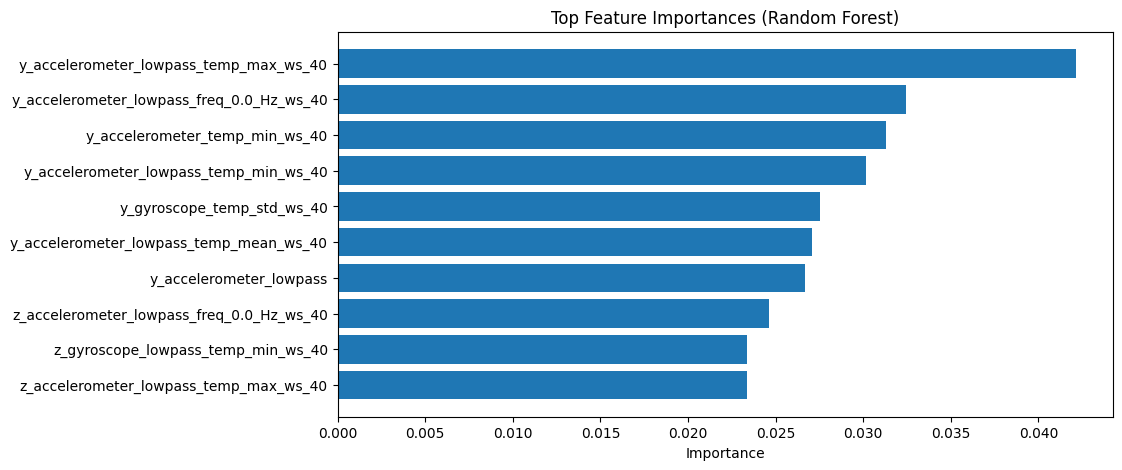

In [12]:
import matplotlib.pyplot as plt

# Show the top 10 features
top_n = 10 
names, scores = zip(*feature_importance[:top_n])

plt.figure(figsize=(10, 5))
# Reverse for descending order
plt.barh(names[::-1], scores[::-1])  
plt.xlabel("Importance")
plt.title("Top Feature Importances (Random Forest)")
plt.show()
